In [7]:
from load_yelp_data import load_yelp_dataframe
from time_augment_reviews import time_augment_reviews
from figure_grid import figure_grid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
chunksize = 10 ** 6
for chunk in pd.read_csv('reviews_with_text.csv', chunksize=chunksize):
    process(chunk)

NameError: name 'process' is not defined

In [42]:
businesses = load_yelp_dataframe('businesses').drop('Unnamed: 0', 1)

In [2]:
reviews = pd.read_csv('reviews_with_text.csv')

/Users/soph/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
reviews.head()
reviews.shape

(2685067, 11)

In [12]:
bus_phx.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,location
2288,"{'Accepts Credit Cards': True, 'Price Range': ...",2288,"['Mattresses', 'Shopping', 'Home Decor', 'Home...",Chandler,"3111 W Chandler Blvd\nSte 1080\nChandler, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.301250,-111.897806,Sleep Number,[],True,3,2.0,AZ,business,Phoenix
2376,"{'Accepts Credit Cards': True, 'Price Range': 2}",2376,"['Shopping', 'Paint Stores', 'Home & Garden']",Scottsdale,"4848 E Cactus Rd Ste 800\nScottsdale, AZ 85254","{'Monday': {'close': '19:00', 'open': '06:00'}...",33.597630,-111.976938,Sherwin-Williams Paint Store,[],True,3,3.5,AZ,business,Phoenix
2377,"{'Accepts Credit Cards': True, 'Noise Level': ...",2377,"['Sandwiches', 'Pizza', 'Chicken Wings', 'Rest...",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004","{'Monday': {'close': '00:00', 'open': '10:00'}...",33.479482,-112.073681,Domino's Pizza,[],True,20,3.0,AZ,business,Phoenix
2378,"{'Accepts Credit Cards': True, 'Noise Level': ...",2378,"['American (New)', 'Sandwiches', 'Restaurants']",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468547,-112.075085,Viad Tower Restaurants,[],True,6,3.5,AZ,business,Phoenix
2379,{},2379,"['Professional Services', 'Criminal Defense La...",Phoenix,"4647 N 32nd St\nSte B170\nPhoenix, AZ 85018","{'Monday': {'close': '20:00', 'open': '08:00'}...",33.506084,-112.011846,Law Office of Sonja Duckstein,[],True,8,5.0,AZ,business,Phoenix


In [44]:
# Classify the datapoints into the cities based on the latitude and the longitude
cities = np.array([['Edinburgh', 55.9533, -3.1883, 0, 0],
         ['Karlsruhe', 49.0069, 8.4037, 0, 0],
         ['Montreal', 45.5017, -73.5673, 0, 0],
         ['Waterloo', 43.4643, -80.5204, 0, 0],
         ['Pittsburgh', 40.4406, -79.9959, 0, 0],
         ['Charlotte', 35.2271, -80.8431, 0, 0],
         ['Urbana-Champaign', 40.1106, -88.2073, 0, -150000],
         ['Phoenix', 33.4484, -112.0740, 0, 0],
         ['Las Vegas', 36.1699, -115.1398, 0, 0],
         ['Madison', 43.0731, -89.4012, 0, 0]])
lat = np.array(cities[:,1], np.float32)
lon = np.array(cities[:,2], np.float32)
x_offsets = np.array(cities[:,3], np.float32)
y_offsets = np.array(cities[:,4], np.float32)

def classify_datapoint_by_latitude_and_longitude(datapoint):
#     print datapoint
    latitude = datapoint['latitude']
    longitude = datapoint['longitude']
    distances = (latitude - lat)**2 + (longitude - lon)**2
    min_dist = np.argmin(distances)
    return cities[min_dist, 0]

businesses['location'] = businesses.apply(classify_datapoint_by_latitude_and_longitude, axis=1)

In [45]:
bus_phx = businesses[(businesses.location=='Phoenix')]
bus_lv = businesses[(businesses.location=='Las Vegas')]

In [16]:
reviews_phx = bus_phx.merge(reviews, how='inner', on=['business_id'])

In [33]:
reviews_phx.head()

,attributes,business_id,categories,latitude,longitude,name,review_count,stars_x,type,location,day,month,stars_y,text,upvotes,user_id,year,date,n_given_same_day
0,"{'Accepts Credit Cards': True, 'Price Range': ...",2288,"['Mattresses', 'Shopping', 'Home Decor', 'Home...",33.30125,-111.897806,Sleep Number,3,2.0,business,Phoenix,28,7,1,The scam of the century! I'm still horrified! ...,3.0,378337.0,2014.0,2014-07-28,1.0
1,"{'Accepts Credit Cards': True, 'Price Range': ...",2288,"['Mattresses', 'Shopping', 'Home Decor', 'Home...",33.30125,-111.897806,Sleep Number,3,2.0,business,Phoenix,27,9,1,I ordered my bed on 8/31 during the Labor Day ...,0.0,580784.0,2014.0,2014-09-27,1.0
2,"{'Accepts Credit Cards': True, 'Price Range': ...",2288,"['Mattresses', 'Shopping', 'Home Decor', 'Home...",33.30125,-111.897806,Sleep Number,3,2.0,business,Phoenix,25,5,4,Went to check out the mattresses at the store ...,0.0,405026.0,2016.0,2016-05-25,3.0
3,"{'Accepts Credit Cards': True, 'Price Range': 2}",2376,"['Shopping', 'Paint Stores', 'Home & Garden']",33.59763,-111.976938,Sherwin-Williams Paint Store,3,3.5,business,Phoenix,19,6,5,I have been remodeling my home and have used t...,0.0,61401.0,2015.0,2015-06-19,3.0
4,"{'Accepts Credit Cards': True, 'Price Range': 2}",2376,"['Shopping', 'Paint Stores', 'Home & Garden']",33.59763,-111.976938,Sherwin-Williams Paint Store,3,3.5,business,Phoenix,3,9,5,"Angela, the store manager is a super star! We...",0.0,405653.0,2015.0,2015-09-03,3.0


In [32]:
reviews_phx.columns

Index([u'attributes', u'business_id', u'categories', u'latitude', u'longitude',
       u'name', u'review_count', u'stars_x', u'type', u'location', u'day',
       u'month', u'stars_y', u'text', u'upvotes', u'user_id', u'year', u'date',
       u'n_given_same_day'],
      dtype='object')

In [34]:
reviews_phx = reviews_phx.drop(['attributes','location','day','month','year'], axis=1)

In [31]:
reviews_phx = reviews_phx.drop(['city','full_address','hours','neighborhoods','open','state','Unnamed: 0'], axis=1)

In [36]:
reviews_lv = reviews_lv.drop(['city','full_address','hours','neighborhoods','open','state','Unnamed: 0','attributes','location','day','month','year'], axis=1)

In [35]:
reviews_phx.to_csv("phx_reviews.csv", delimiter=',')

In [22]:
reviews_lv = bus_lv.merge(reviews, how='inner', on=['business_id'])

In [23]:
reviews_lv.head()
reviews_lv.columns
reviews_lv.shape

(1155855, 26)

In [4]:
reviews_lv = pd.read_csv('lv_reviews.csv')

In [37]:
reviews_lv.to_csv("lv_reviews.csv", delimiter=',')

In [69]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
# t0 = time()
# dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                              remove=('headers', 'footers', 'quotes'))
# data_samples = dataset.data[:n_samples]
data_samples = reviews_lv.text
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 4942.265s.
Extracting tf-idf features for NMF...
done in 203.414s.
Extracting tf features for LDA...
done in 195.616s.
Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 233.353s.

Topics in NMF model:
Topic #0:
food service excellent restaurant fast quality server amazing customer wait delicious mexican order eat come slow better bad table atmosphere
Topic #1:
room time just hotel like got did don didn people said went told day stay car know nice minutes night
Topic #2:
great service friendly staff awesome recommend definitely atmosphere experience job highly prices time amazing customer nice helpful selection happy clean
Topic #3:
place like awesome try nice recommend people just definitely eat don cool really want looking clean come places bar fun
Topic #4:
good really pretty nice price prices selection little overall drinks buffet beer bit decent bar breakfast lot friendly music like
Topic #5:
love staff friendly ama

KeyboardInterrupt: 

In [70]:
import pickle 

pickle.dump( lda, open( "lda.p", "wb" ) )
pickle.dump(tf_feature_names, open( "feature_names.p", "wb" ))

NameError: name 'tf_feature_names' is not defined

In [63]:
print(data_samples[0])

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



In [5]:
reviews_lv_rest = reviews_lv[reviews_lv['categories'].apply( lambda x: 'Restaurants' in x)]
reviews_lv_rest.head()


,Unnamed: 0,business_id,categories,latitude,longitude,name,review_count,stars_x,type,stars_y,text,upvotes,user_id,date,n_given_same_day
31,31,8413,"['Burgers', 'Fast Food', 'Restaurants']",36.025017,-115.063136,McDonald's,33,2.0,business,1,This McDonalds is absolutely awful. It always...,2.0,67269.0,2007-04-05,2.0
32,32,8413,"['Burgers', 'Fast Food', 'Restaurants']",36.025017,-115.063136,McDonald's,33,2.0,business,3,"Good location, s-l-o-w service. Funny crew, o...",4.0,143364.0,2007-12-01,8.0
33,33,8413,"['Burgers', 'Fast Food', 'Restaurants']",36.025017,-115.063136,McDonald's,33,2.0,business,1,If I could give this McDonald's a negative sta...,2.0,426091.0,2009-03-27,2.0
34,34,8413,"['Burgers', 'Fast Food', 'Restaurants']",36.025017,-115.063136,McDonald's,33,2.0,business,1,Who reviews a McDonalds? No one. This review c...,1.0,505574.0,2009-05-02,1.0
35,35,8413,"['Burgers', 'Fast Food', 'Restaurants']",36.025017,-115.063136,McDonald's,33,2.0,business,1,"McDonald's usually is good for an inexpensive,...",9.0,169826.0,2012-02-17,1.0


In [79]:
n_samples = 2000
n_features = 1000
n_topics = 50
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
# t0 = time()
# dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                              remove=('headers', 'footers', 'quotes'))
# data_samples = dataset.data[:n_samples]
data_samples = reviews_lv_rest.text
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 524.086s.
Extracting tf-idf features for NMF...
done in 124.294s.
Extracting tf features for LDA...
done in 112.367s.
Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 1209.978s.

Topics in NMF model:
Topic #0:
food fast mexican chinese authentic priced atmosphere portions come indian overpriced cold mediocre ok italian drinks decent family people average
Topic #1:
great atmosphere service experience prices selection server spot fun loved music fantastic view family wonderful value job definitely ambiance thanks
Topic #2:
pizza crust slice pizzas toppings cheese wings garlic delivery slices style sauce ny sausage pie york new white italian ordered
Topic #3:
sushi rolls ayce fish roll sashimi chefs chef japanese tuna salmon quality favorite tempura places miso spot ice cream pieces
Topic #4:
burger fries burgers shake cheese bacon onion bun truffle rings potato sweet chili juicy ordered medium cooked joint onions double


In [80]:
pickle.dump( lda, open( "lda.p", "wb" ) )

In [81]:
pickle.dump(tf_feature_names, open( "feature_names.p", "wb" ))

In [86]:
print (tf.shape)
print (reviews_lv_rest.shape)

transformed = lda.transform(tf)

(663339, 1000)
(663339, 14)


In [87]:
print(transformed.shape)

(663339, 50)


In [88]:
pickle.dump(transformed, open( "transformed.p", "wb" ))

In [111]:
print ([i for i in range(len(transformed[0])) if transformed[0][i]>2])
print ([i for i in range(len(transformed[1])) if transformed[1][i]>2])
print ([i for i in range(len(transformed[100])) if transformed[100][i]>2])

[20, 29, 45, 46]
[21, 23]
[6, 13, 17, 18, 21, 31, 32, 35, 43]


In [6]:
print (reviews_lv_rest.categories)

31                   ['Burgers', 'Fast Food', 'Restaurants']
32                   ['Burgers', 'Fast Food', 'Restaurants']
33                   ['Burgers', 'Fast Food', 'Restaurants']
34                   ['Burgers', 'Fast Food', 'Restaurants']
35                   ['Burgers', 'Fast Food', 'Restaurants']
36                   ['Burgers', 'Fast Food', 'Restaurants']
37                   ['Burgers', 'Fast Food', 'Restaurants']
38                   ['Burgers', 'Fast Food', 'Restaurants']
39                   ['Burgers', 'Fast Food', 'Restaurants']
40                   ['Burgers', 'Fast Food', 'Restaurants']
41                   ['Burgers', 'Fast Food', 'Restaurants']
42                   ['Burgers', 'Fast Food', 'Restaurants']
43                   ['Burgers', 'Fast Food', 'Restaurants']
44                   ['Burgers', 'Fast Food', 'Restaurants']
45                   ['Burgers', 'Fast Food', 'Restaurants']
46                   ['Burgers', 'Fast Food', 'Restaurants']
47                   ['B

In [34]:
import ast
from collections import Counter
cnt = Counter()
categories = set()
for i in range(len(reviews_lv_rest)):
    for x in ast.literal_eval(reviews_lv_rest.categories.iloc[i]):
#         categories.add(x)
        cnt[x]+=1
        

print cnt

Counter({'Restaurants': 663339, 'Nightlife': 90067, 'American (Traditional)': 88219, 'Bars': 86511, 'Breakfast & Brunch': 78359, 'American (New)': 77423, 'Food': 56056, 'Mexican': 55786, 'Japanese': 55393, 'Steakhouses': 51969, 'Burgers': 49369, 'Italian': 49103, 'Pizza': 46201, 'Sushi Bars': 42788, 'Seafood': 42325, 'Buffets': 37473, 'Sandwiches': 36491, 'Chinese': 35116, 'Fast Food': 24615, 'Asian Fusion': 23263, 'Barbeque': 22889, 'Thai': 21617, 'French': 19203, 'Cafes': 18041, 'Korean': 15847, 'Lounges': 15359, 'Desserts': 14464, 'Mediterranean': 13903, 'Sports Bars': 12760, 'Salad': 11576, 'Vietnamese': 11444, 'Hawaiian': 10773, 'Coffee & Tea': 9964, 'Vegetarian': 9532, 'Chicken Wings': 9361, 'Diners': 8387, 'Arts & Entertainment': 8345, 'Delis': 8289, 'Tapas/Small Plates': 8211, 'Bakeries': 7879, 'Wine Bars': 7602, 'Vegan': 7551, 'Southern': 7473, 'Cocktail Bars': 7420, 'Tapas Bars': 7356, 'Pubs': 7283, 'Juice Bars & Smoothies': 7031, 'Gluten-Free': 6737, 'Indian': 6576, 'Cajun/C

In [47]:
lv_rest = bus_lv[bus_lv['categories'].apply( lambda x: 'Restaurants' in x)]
cnt_bus = Counter()
# categories_bus = set()
for i in range(len(lv_rest)):
    for x in ast.literal_eval(lv_rest.categories.iloc[i]):
        categories.add(x)
        cnt_bus[x]+=1

print cnt_bus

Counter({'Restaurants': 5914, 'Fast Food': 881, 'Mexican': 737, 'American (Traditional)': 648, 'Pizza': 611, 'Sandwiches': 579, 'Nightlife': 571, 'Bars': 539, 'Food': 474, 'Burgers': 469, 'Chinese': 424, 'American (New)': 401, 'Italian': 352, 'Breakfast & Brunch': 304, 'Japanese': 303, 'Seafood': 237, 'Sushi Bars': 227, 'Steakhouses': 198, 'Chicken Wings': 182, 'Barbeque': 170, 'Cafes': 169, 'Asian Fusion': 157, 'Sports Bars': 149, 'Thai': 145, 'Delis': 128, 'Buffets': 119, 'Mediterranean': 111, 'Hawaiian': 101, 'Salad': 99, 'Korean': 95, 'Hot Dogs': 91, 'Pubs': 88, 'Bakeries': 81, 'Diners': 80, 'Vietnamese': 78, 'Coffee & Tea': 71, 'Desserts': 69, 'Tex-Mex': 69, 'Arts & Entertainment': 66, 'Juice Bars & Smoothies': 65, 'Filipino': 62, 'Lounges': 58, 'Latin American': 58, 'French': 52, 'Greek': 52, 'Vegetarian': 51, 'Gluten-Free': 48, 'Vegan': 46, 'Indian': 43, 'Food Trucks': 43, 'Southern': 40, 'Specialty Food': 40, 'Wine Bars': 39, 'Food Stands': 38, 'Middle Eastern': 38, 'Casinos': 

[]

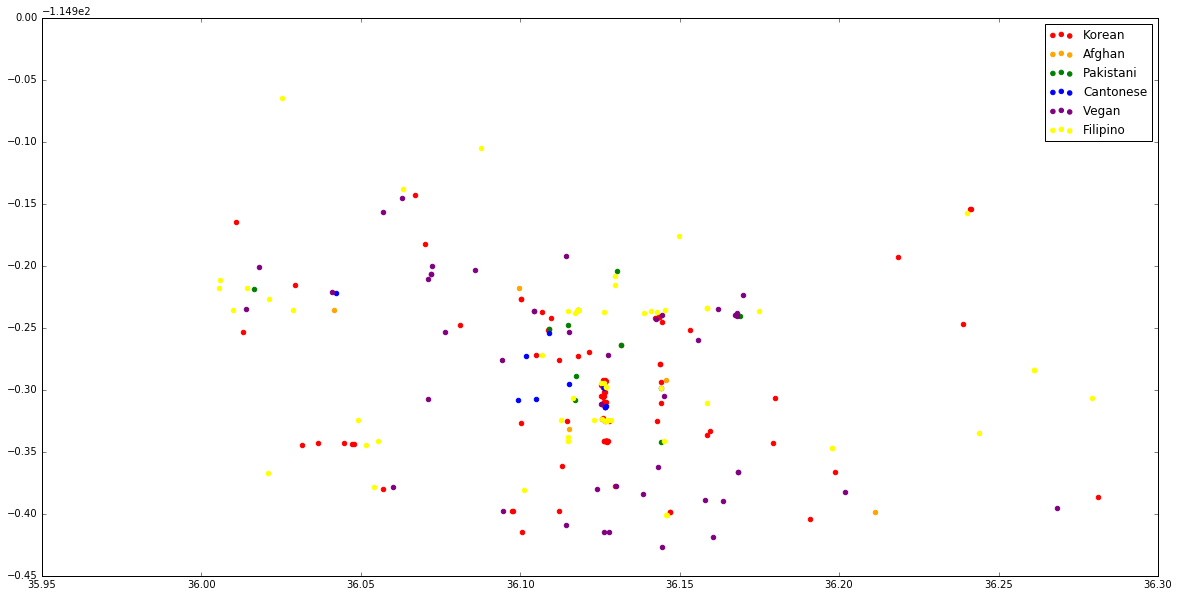

In [76]:
# rest_cat = reviews_lv_rest['Shanghainese' in reviews_lv_rest.categories]
from pylab import *
NUM_COLORS = 7
# colors=[]
colors=['red','orange','green','blue','purple','yellow']
selected_cats = ['Korean','Afghan','Pakistani','Cantonese','Vegan','Filipino']
# cm = get_cmap('rainbow')
# for i in range(NUM_COLORS):
#     colors.append(cm(1.*i/NUM_COLORS))
plt.figure(figsize=(20,10)) 
for i in range(len(selected_cats)):
    rest_cat = lv_rest[lv_rest['categories'].apply( lambda x: selected_cats[i] in x)]
    plt.scatter(rest_cat['latitude'], rest_cat['longitude'], alpha = 1, color=colors[i], label='{}'.format(selected_cats[i]))
plt.legend(loc='best')
plt.plot()

In [64]:
print cnt_bus[cnt_bus.keys()[186]]

31


In [95]:
rest_closed = lv_rest[lv_rest['open']==False]
good_rest_closed = rest_closed[rest_closed['stars']>4.0]
bad_rest_closed = rest_closed[rest_closed['stars']<3.0]

In [97]:
rest_open = lv_rest[lv_rest['open']==True]
good_rest_open = rest_open[rest_open['stars']>4.0]
bad_rest_open = rest_open[rest_open['stars']<3.0]

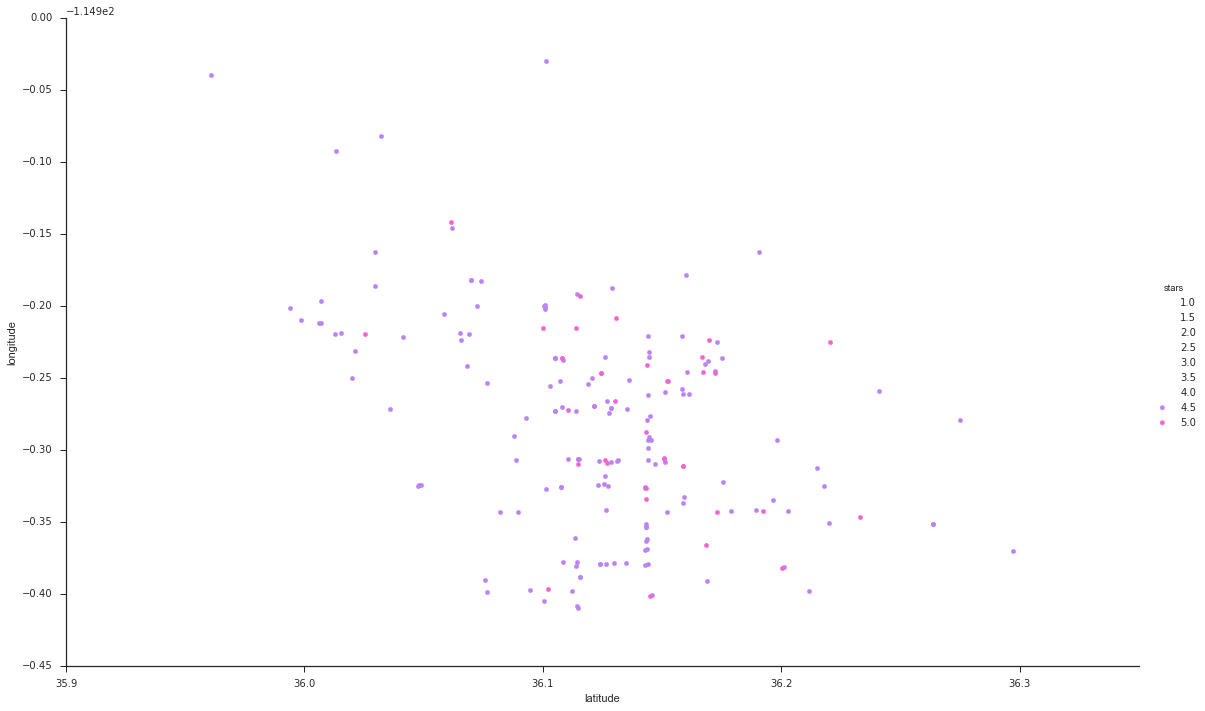

In [93]:
import seaborn
seaborn.set(style='ticks')

_stars= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
fg = seaborn.FacetGrid(data=good_rest_closed, hue='stars', hue_order=_stars, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()

# plt.scatter(rest_closed['latitude'], rest_closed['longitude'], color=rest_closed['stars'])

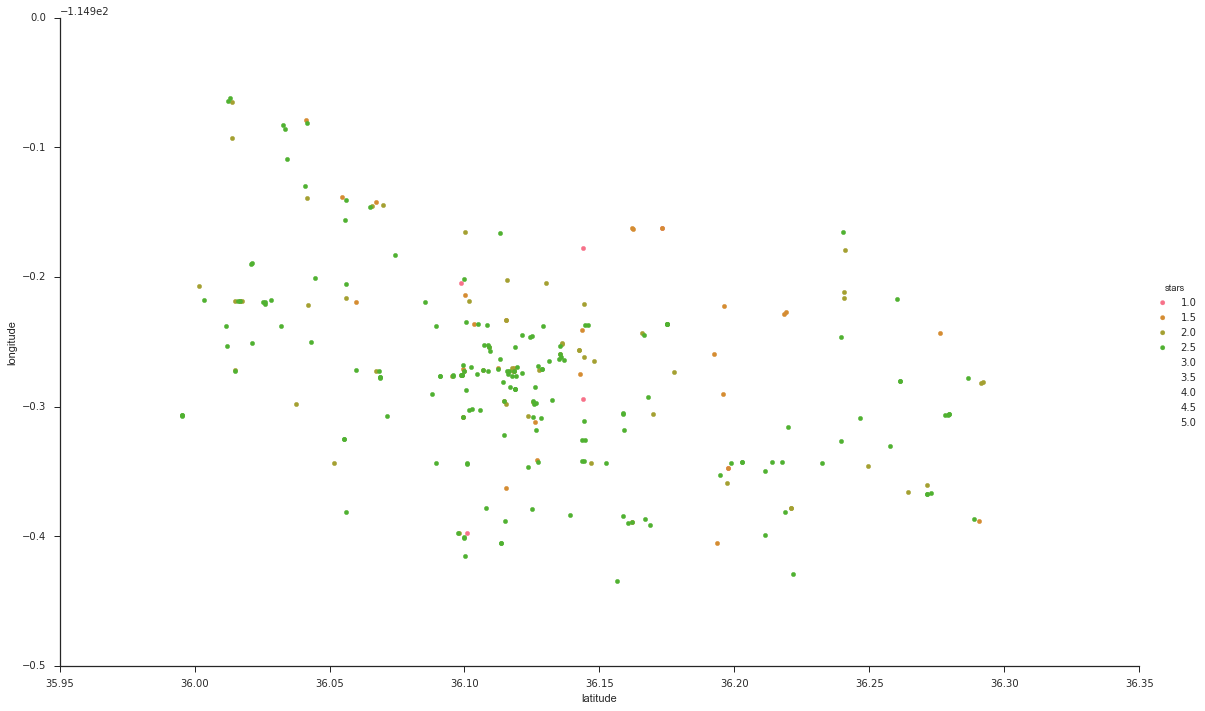

In [96]:
seaborn.set(style='ticks')

_stars= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
fg = seaborn.FacetGrid(data=bad_rest_closed, hue='stars', hue_order=_stars, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()



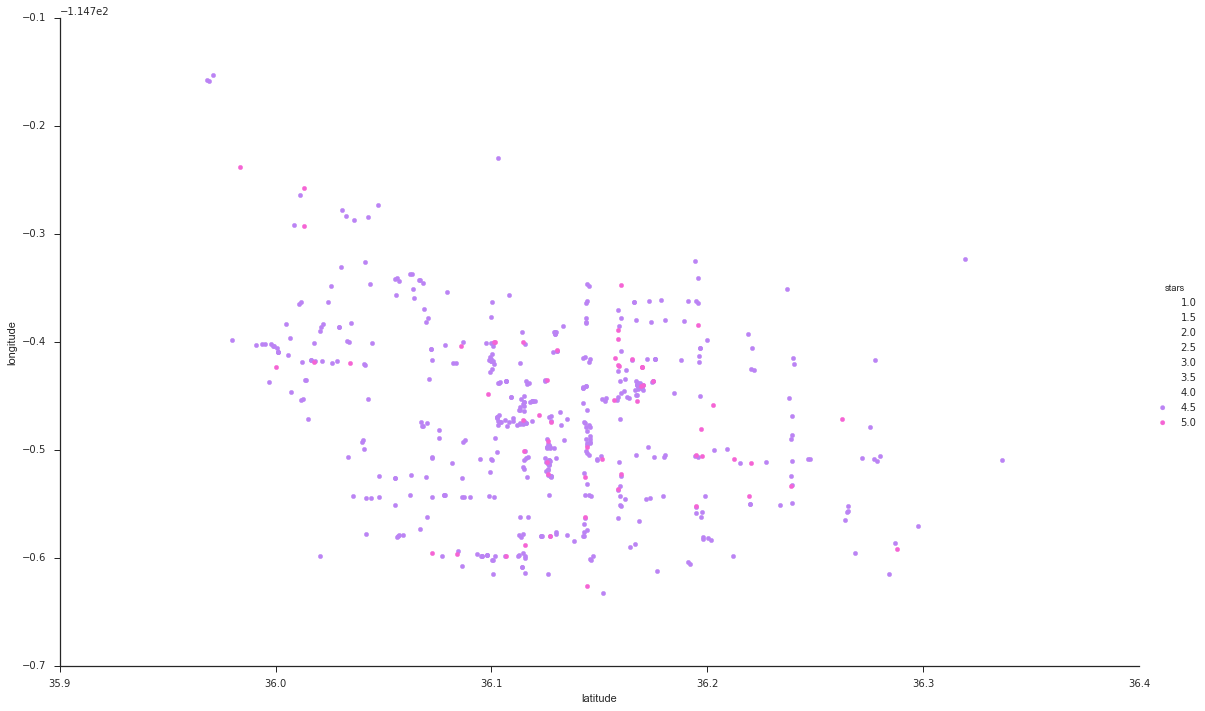

In [98]:
seaborn.set(style='ticks')

_stars= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
fg = seaborn.FacetGrid(data=good_rest_open, hue='stars', hue_order=_stars, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()



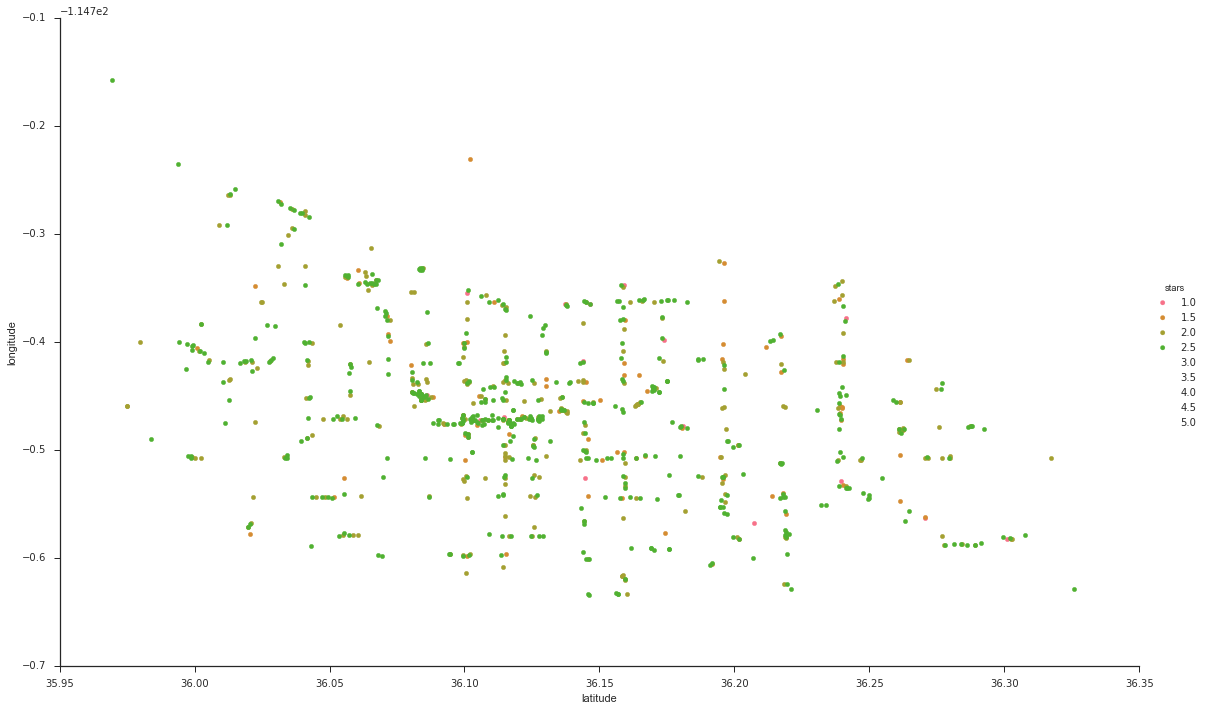

In [100]:
seaborn.set(style='ticks')

_stars= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
fg = seaborn.FacetGrid(data=bad_rest_open, hue='stars', hue_order=_stars, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()



In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30).fit(lv_rest[['latitude','longitude']])
print(kmeans.labels_)
lv_rest['cluster'] = kmeans.predict(lv_rest[['latitude','longitude']])
kmeans.cluster_centers_

[20 20 20 ...,  7 14 14]


/Users/soph/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[  36.17017323, -115.13632171],
       [  36.11792433, -115.20602568],
       [  36.07198862, -115.08555121],
       [  36.19950463, -115.24850245],
       [  36.1538751 , -115.3302183 ],
       [  36.01095826, -115.10939471],
       [  36.02404714, -114.978801  ],
       [  36.06108757, -115.23748398],
       [  36.11206312, -115.17301184],
       [  36.28196028, -115.27441969],
       [  36.16419749, -115.06802504],
       [  36.23429441, -115.11268163],
       [  36.10914697, -115.29658864],
       [  36.15202396, -115.28411204],
       [  36.23806625, -115.22682512],
       [  36.16294759, -115.20174914],
       [  36.05671673, -115.11989367],
       [  36.10724444, -115.14009412],
       [  36.03280635, -115.17593793],
       [  35.96987823, -114.87470449],
       [  36.05530561, -115.04286074],
       [  36.24587282, -115.15938998],
       [  36.23239973, -115.05277158],
       [  36.11518388, -115.08889823],
       [  36.14391496, -115.157191  ],
       [  36.13495247, -1

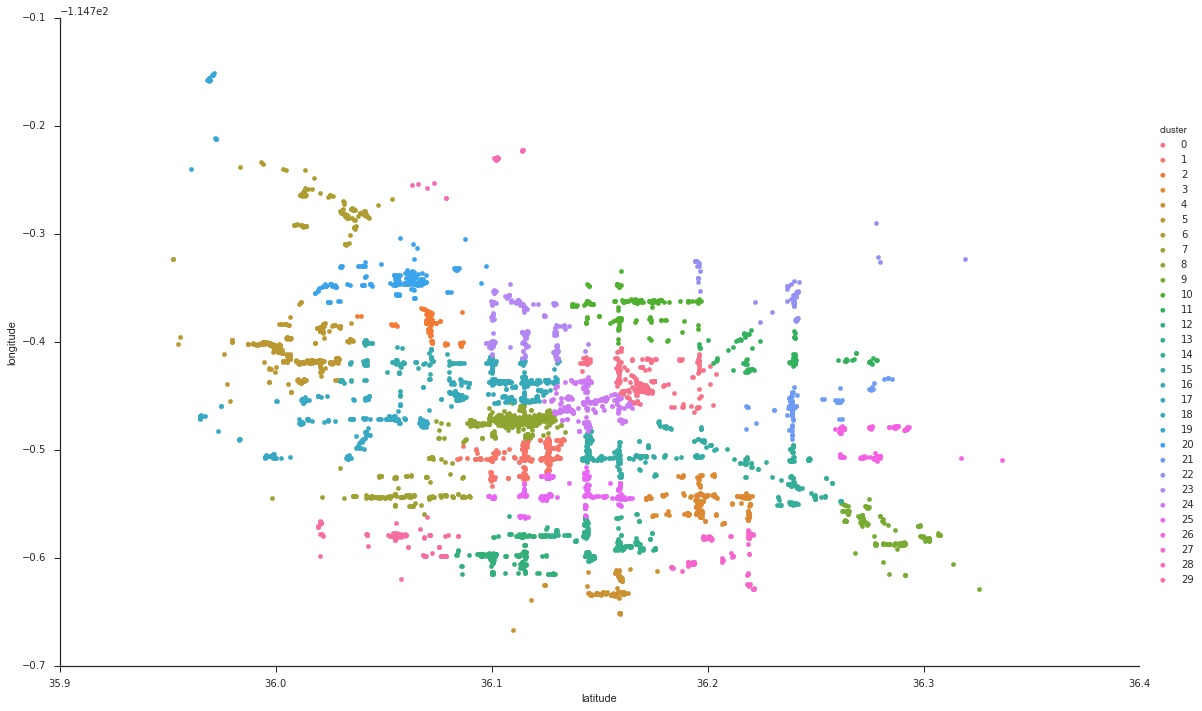

In [106]:
seaborn.set(style='ticks')

_clusters = range(0,30)
fg = seaborn.FacetGrid(data=lv_rest, hue='cluster', hue_order=_clusters, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()

In [115]:
print sorted(list(lv_rest.groupby(['cluster'])['open'].mean()))

[0.58333333333333337, 0.60984848484848486, 0.64082687338501287, 0.65274151436031336, 0.66972477064220182, 0.67368421052631577, 0.67906976744186043, 0.68803418803418803, 0.69314079422382668, 0.70531400966183577, 0.70904645476772621, 0.71739130434782605, 0.72499999999999998, 0.72727272727272729, 0.73043478260869565, 0.73563218390804597, 0.7450199203187251, 0.74545454545454548, 0.75, 0.7528089887640449, 0.76811594202898548, 0.76923076923076927, 0.76984126984126988, 0.77570093457943923, 0.77927927927927931, 0.8035714285714286, 0.83132530120481929, 0.84042553191489366, 0.84313725490196079, 0.88666666666666671]


In [109]:
lv_rest.groupby(['cluster'])['stars'].mean()

cluster
0     3.584848
1     3.510336
2     3.473684
3     3.376812
4     3.397059
5     3.522193
6     3.300000
7     3.548851
8     3.330013
9     3.318841
10    3.316667
11    3.281915
12    3.616972
13    3.555814
14    3.353175
15    3.455128
16    3.417355
17    3.322738
18    3.362500
19    3.687500
20    3.342342
21    3.114458
22    3.214286
23    3.438202
24    3.382671
25    3.573864
26    3.173077
27    3.298913
28    3.541667
29    3.476636
Name: stars, dtype: float64

In [112]:
def add_cluster(lv_rest):
    lv_rest['cluster_open'] = lv_rest['open'].mean()
    return lv_rest

lv_rest = lv_rest.groupby('cluster').apply(add_cluster)

In [118]:
def add_star_cluster(lv_rest):
    lv_rest['cluster_mean'] = lv_rest['stars'].mean()
    return lv_rest

lv_rest = lv_rest.groupby('cluster').apply(add_star_cluster)

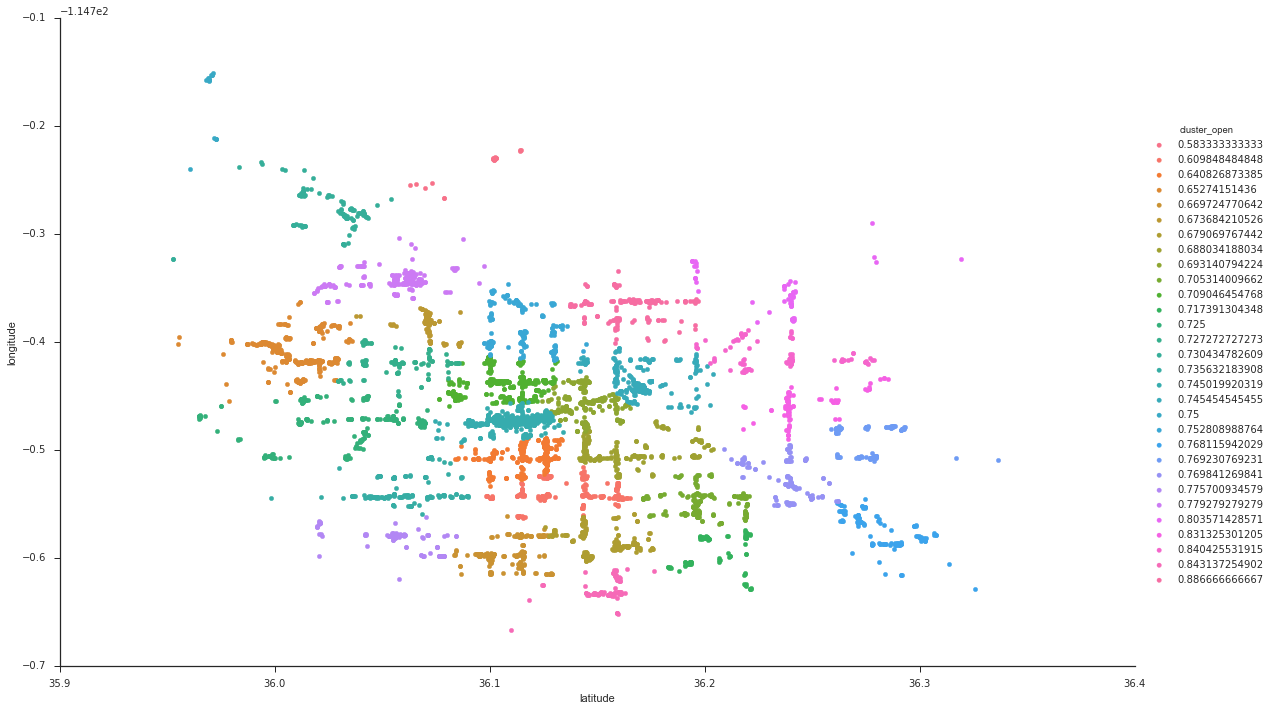

In [116]:
seaborn.set(style='ticks')

_clusters = sorted(list(lv_rest.groupby(['cluster'])['open'].mean()))
fg = seaborn.FacetGrid(data=lv_rest, hue='cluster_open', hue_order=_clusters, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()

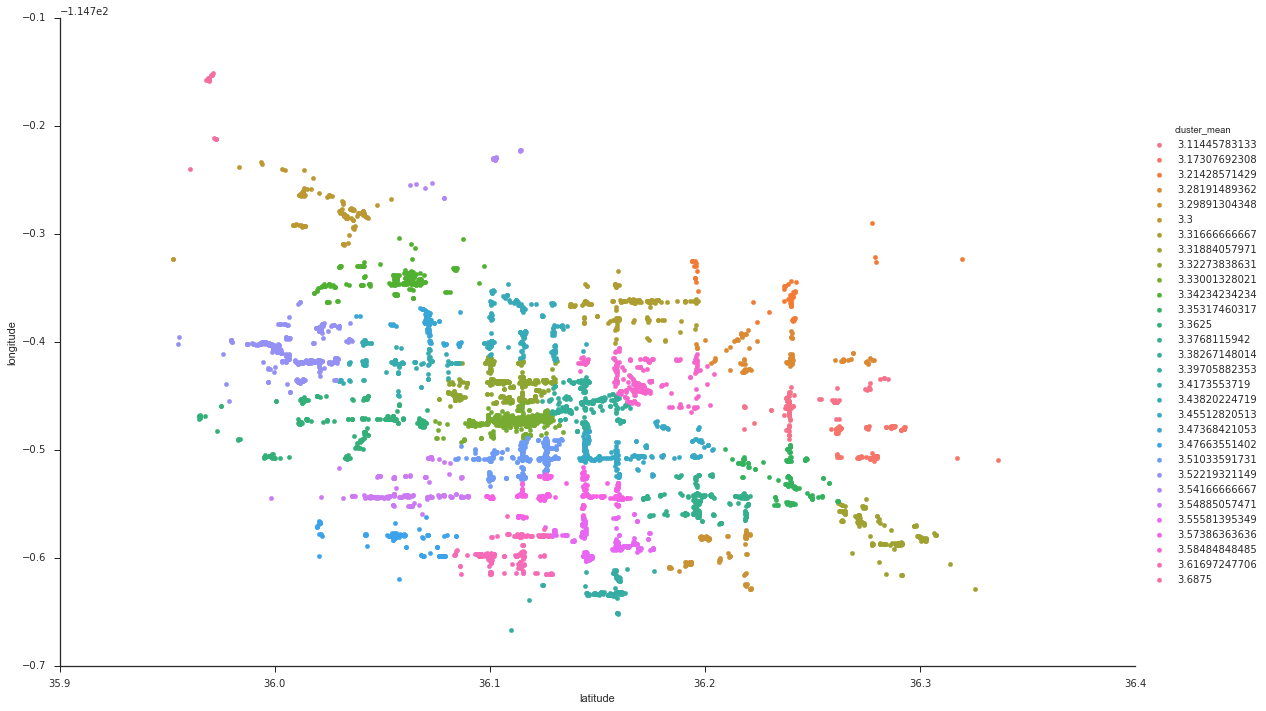

In [119]:
seaborn.set(style='ticks')

_clusters = sorted(list(lv_rest.groupby(['cluster'])['stars'].mean()))
fg = seaborn.FacetGrid(data=lv_rest, hue='cluster_mean', hue_order=_clusters, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()

In [129]:
lv_rest_open = lv_rest[lv_rest['open']==True]
lv_rest_closed = lv_rest[lv_rest['open']==False]

In [124]:
kmeans = KMeans(n_clusters=30).fit(lv_rest_open[['latitude','longitude']])
# print(kmeans.labels_)
lv_rest_open['cluster'] = kmeans.predict(lv_rest_open[['latitude','longitude']])
# kmeans.cluster_centers_

[ 5  5  5 ..., 13  2  2]


array([[  36.00665244, -115.09778096],
       [  36.10026633, -115.22247058],
       [  36.2383434 , -115.22733849],
       [  36.16394483, -115.30852466],
       [  36.17102059, -115.13536184],
       [  36.05530561, -115.04286074],
       [  36.05674577, -115.28264808],
       [  36.11252172, -115.17207353],
       [  36.23950912, -115.09471028],
       [  35.96987823, -114.87470449],
       [  36.28210836, -115.27460429],
       [  36.11618536, -115.08626322],
       [  36.01948986, -115.1236482 ],
       [  36.05668777, -115.23995621],
       [  36.16833472, -115.06472605],
       [  36.02404714, -114.978801  ],
       [  36.14774991, -115.24883349],
       [  36.17567427, -115.20499061],
       [  36.11219668, -115.29360108],
       [  36.14455725, -115.15774478],
       [  36.05278571, -115.17640555],
       [  36.27667718, -115.19032544],
       [  35.99967969, -115.17728654],
       [  36.07562628, -115.13449719],
       [  36.20329584, -115.25799945],
       [  36.06794531, -1

In [127]:
def add_star_cluster(lv_rest_open):
    lv_rest_open['cluster_mean'] = lv_rest_open['stars'].mean()
    return lv_rest_open

lv_rest_open = lv_rest_open.groupby('cluster').apply(add_star_cluster)

In [130]:
def add_star_cluster(lv_rest_closed):
    lv_rest_closed['cluster_mean'] = lv_rest_closed['stars'].mean()
    return lv_rest_closed

lv_rest_closed = lv_rest_closed.groupby('cluster').apply(add_star_cluster)

In [132]:
def add_review_cluster(lv_rest_closed):
    lv_rest_closed['cluster_reviews'] = lv_rest_closed['review_count'].mean()
    return lv_rest_closed

lv_rest_closed = lv_rest_closed.groupby('cluster').apply(add_review_cluster)

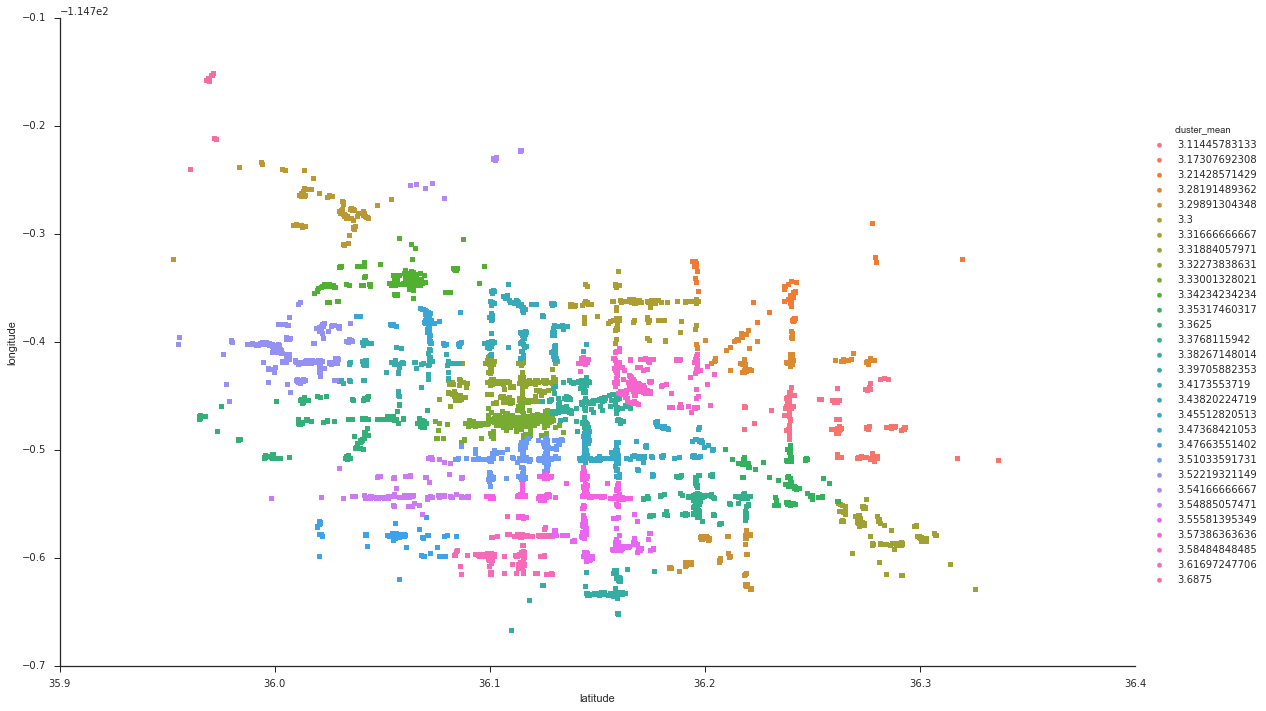

In [128]:
seaborn.set(style='ticks')

_clusters = sorted(list(lv_rest_open.groupby(['cluster'])['stars'].mean()))
fg = seaborn.FacetGrid(data=lv_rest_open, hue='cluster_mean', hue_order=_clusters, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()

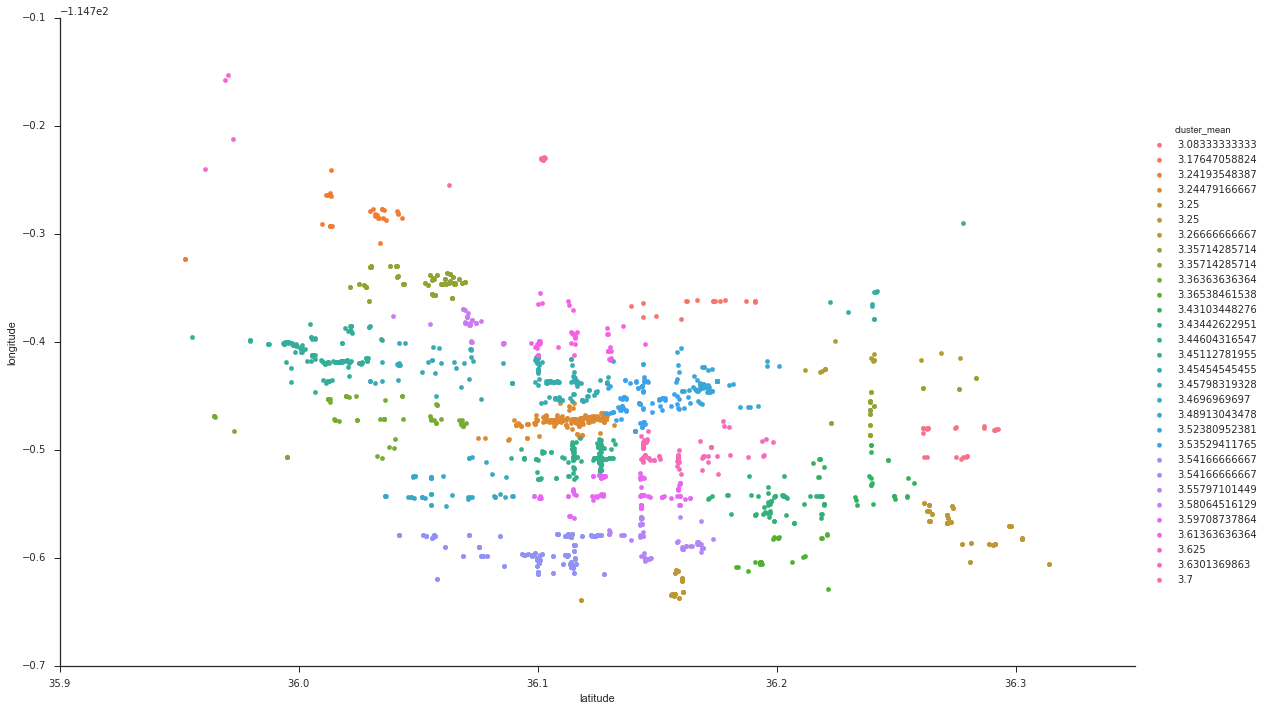

In [131]:
seaborn.set(style='ticks')

_clusters = sorted(list(lv_rest_closed.groupby(['cluster'])['stars'].mean()))
fg = seaborn.FacetGrid(data=lv_rest_closed, hue='cluster_mean', hue_order=_clusters, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()

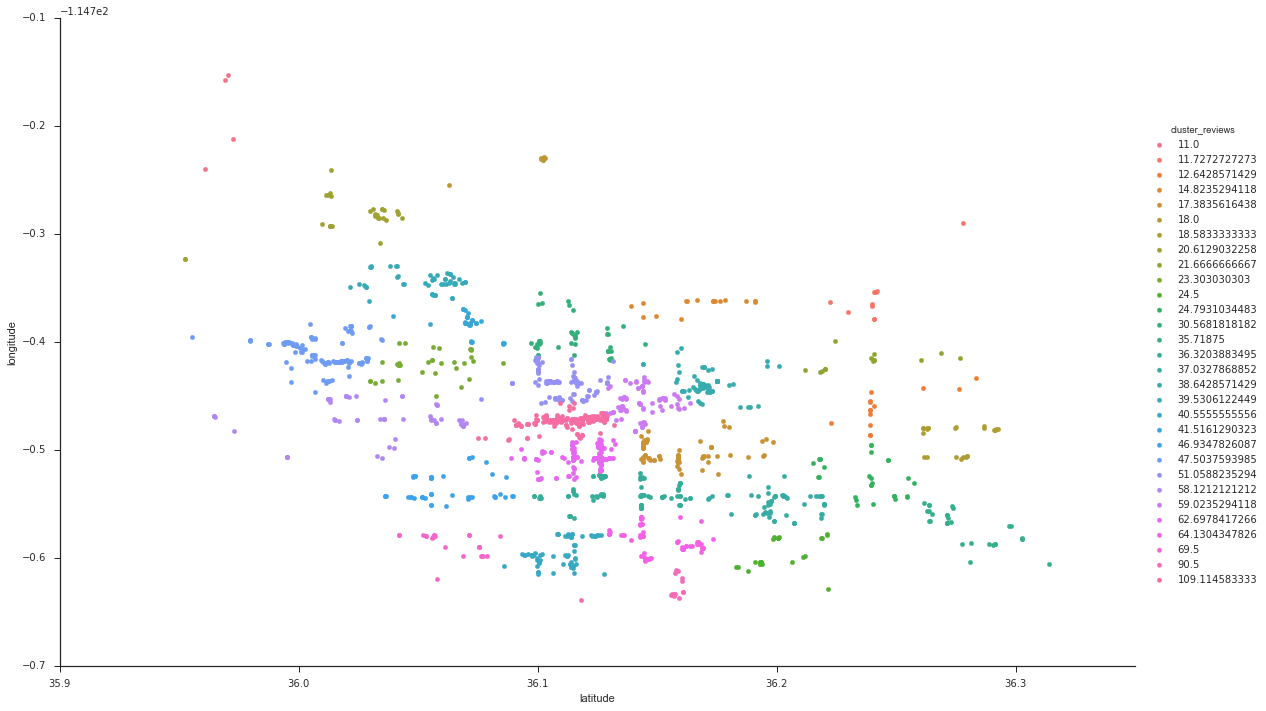

In [133]:
seaborn.set(style='ticks')

_clusters = sorted(list(lv_rest_closed.groupby(['cluster'])['review_count'].mean()))
fg = seaborn.FacetGrid(data=lv_rest_closed, hue='cluster_reviews', hue_order=_clusters, size=10, aspect=1.61)
fg.map(plt.scatter, 'latitude', 'longitude').add_legend()